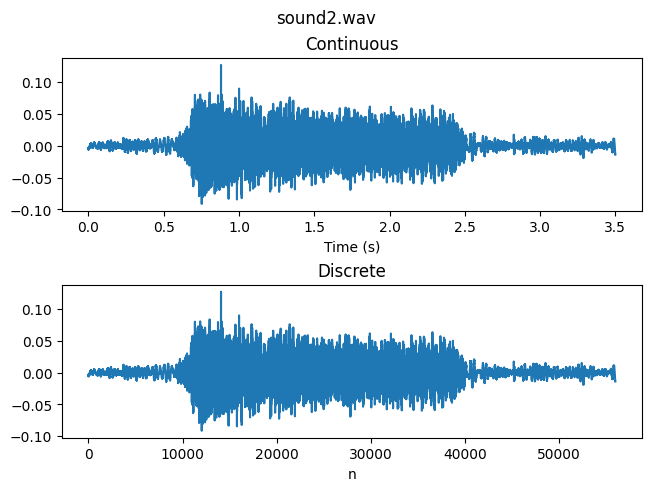

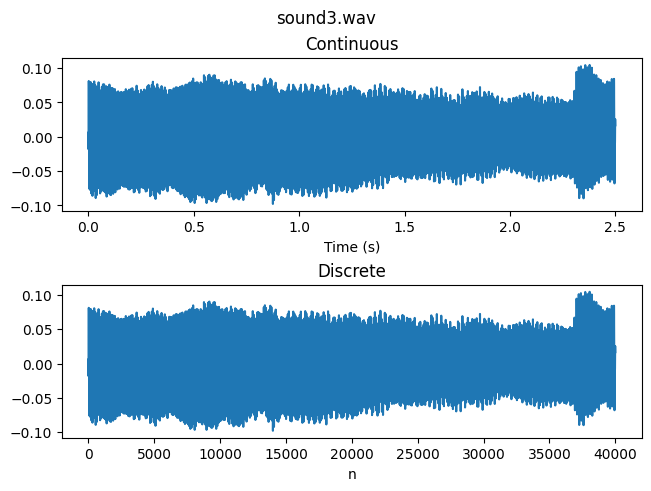

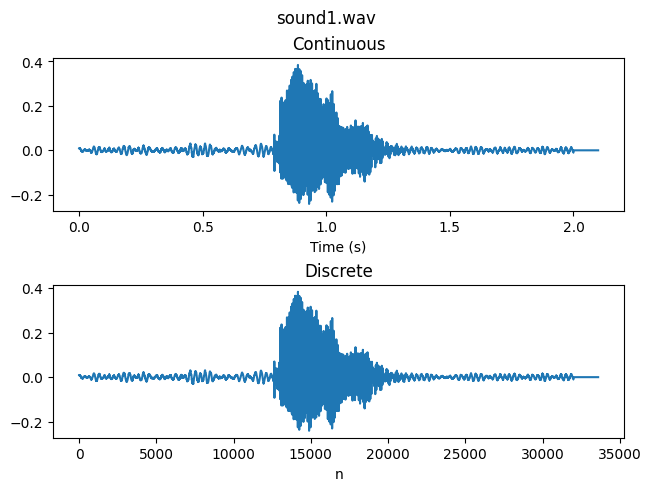

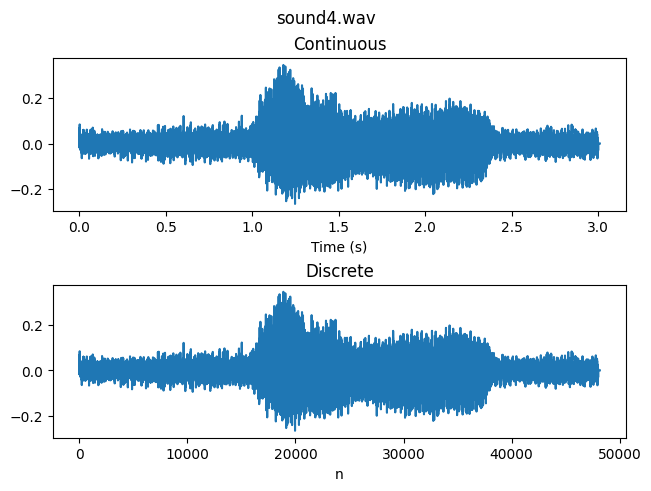

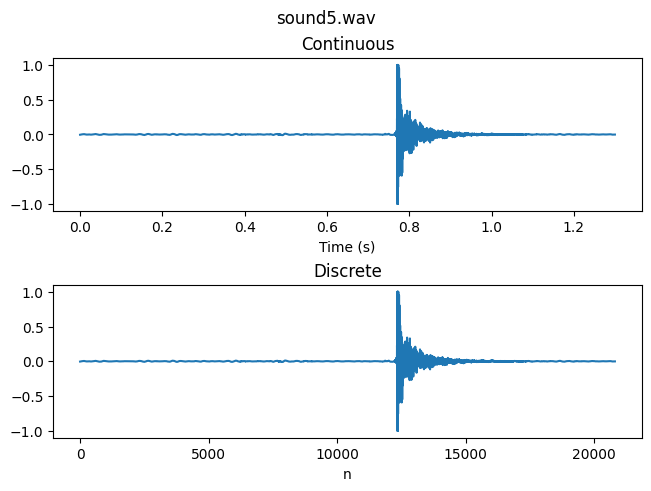

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io.wavfile as wav
import sys
# import simpleaudio as sa

# Add the current directory to the path so we can import the plot and frames modules
sys.path.append('.')

from plot import plot_continuous, plot_continuous_discrete
from frames import non_overlapping_frames, overlapping_frames
from fundamental_frecuency import calculate_fundamental_frequency

AUDIO_DIR = '../audio'

# Plot all the .wav files in the audio directory
for file in os.listdir(AUDIO_DIR):
    if file.endswith('.wav'):
        file_path = os.path.join(AUDIO_DIR, file)
        fs, y = wav.read(file_path)
        y = y / 2 ** 15 # normalize the signal
        plot_continuous_discrete(y, fs, file)

        # play the sound (simpleaudio seems to be broken in python 3.12 and may cause a crash)
        # wave_obj = sa.WaveObject.from_wave_file(file_path)
        # play_obj = wave_obj.play()
        # play_obj.wait_done()

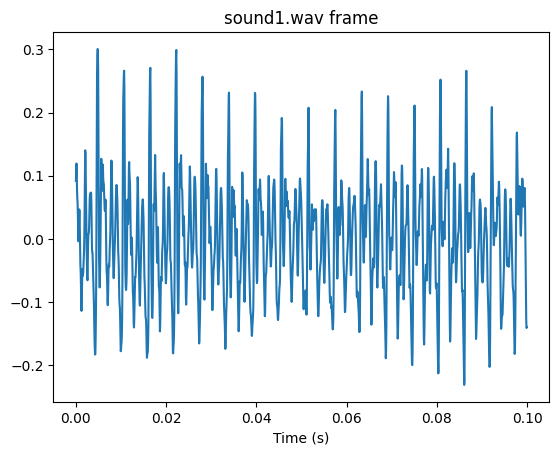

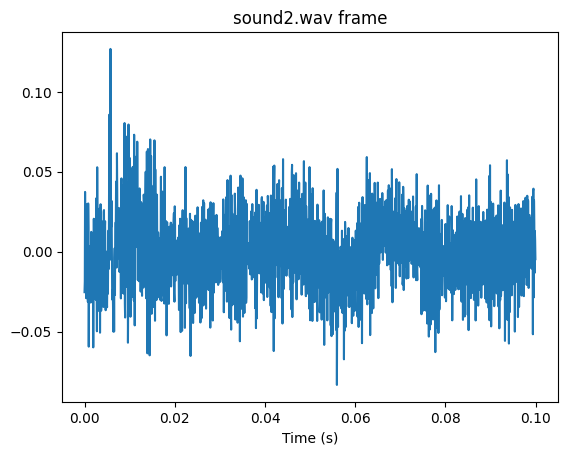

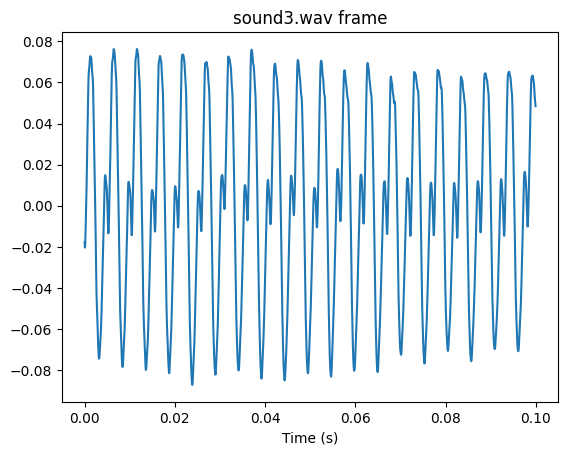

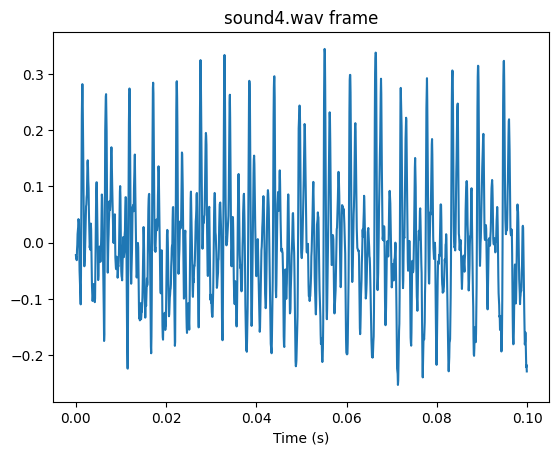

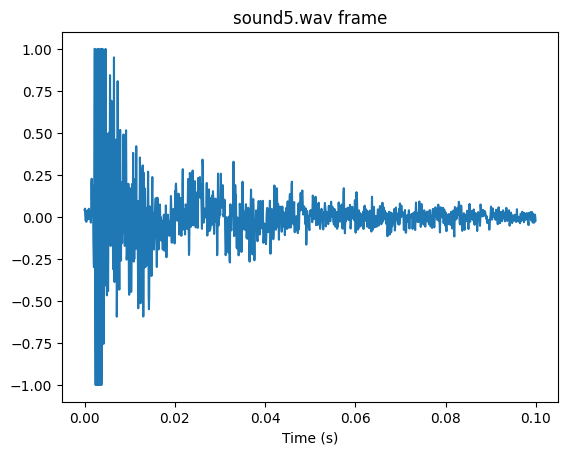

In [20]:
# get the signal and the sampling frequency of .wav files
fs1, y1 = wav.read(os.path.join(AUDIO_DIR, 'sound1.wav'))
fs2, y2 = wav.read(os.path.join(AUDIO_DIR, 'sound2.wav'))
fs3, y3 = wav.read(os.path.join(AUDIO_DIR, 'sound3.wav'))
fs4, y4 = wav.read(os.path.join(AUDIO_DIR, 'sound4.wav'))
fs5, y5 = wav.read(os.path.join(AUDIO_DIR, 'sound5.wav')) 

# normalize the signals to match with matlab behavior
# samples are 16-bit signed integers in the range -32768 to 32767
y1 = y1 / 2 ** 15
y2 = y2 / 2 ** 15
y3 = y3 / 2 ** 15
y4 = y4 / 2 ** 15
y5 = y5 / 2 ** 15

# extract and visualize a 100ms frame from each signal
yframe1_len = round(0.1 * fs1)
yframe2_len = round(0.1 * fs2)
yframe3_len = round(0.1 * fs3)
yframe4_len = round(0.1 * fs4)
yframe5_len = round(0.1 * fs5)

# extract the frames from the original signals.
# The start and end values are chosen by hand to get the relevant part of the signals
yframe1 = y1[15000:15000 + yframe1_len]
yframe2 = y2[14000:14000 + yframe2_len]
yframe3 = y3[1000:1000 + yframe3_len]
yframe4 = y4[18000:18000 + yframe4_len]
yframe5 = y5[12300:12300 + yframe5_len]

plot_continuous(yframe1, fs1, 'sound1.wav frame')
plot_continuous(yframe2, fs2, 'sound2.wav frame')
plot_continuous(yframe3, fs3, 'sound3.wav frame')
plot_continuous(yframe4, fs4, 'sound4.wav frame')
plot_continuous(yframe5, fs5, 'sound5.wav frame')

In [21]:
# only the first, third and fourth signals are periodic
print(f"Fundamental frecuecny of signal sound1.waw: {calculate_fundamental_frequency(yframe1, fs1)} hz")
print(f"Fundamental frecuecny of signal sound3.waw: {calculate_fundamental_frequency(yframe3, fs3)} hz")
print(f"Fundamental frecuecny of signal sound4.waw: {calculate_fundamental_frequency(yframe4, fs4)} hz")

Fundamental frecuecny of signal sound1.waw: 694.7637292464879 hz
Fundamental frecuecny of signal sound3.waw: 194.0700808625337 hz
Fundamental frecuecny of signal sound4.waw: 873.0964467005076 hz


In [22]:
# power of the signals
print(f'Power of sound1.wav: {(y1 ** 2).mean()} W')
print(f'Power of sound2.wav: {(y2 ** 2).mean()} W')
print(f'Power of sound3.wav: {(y3 ** 2).mean()} W')
print(f'Power of sound4.wav: {(y4 ** 2).mean()} W')
print(f'Power of sound5.wav: {(y5 ** 2).mean()} W')

# energy of the signals
print(f'Energy of sound1.wav: {(y1 ** 2).sum()} J')
print(f'Energy of sound2.wav: {(y2 ** 2).sum()} J')
print(f'Energy of sound3.wav: {(y3 ** 2).sum()} J')
print(f'Energy of sound4.wav: {(y4 ** 2).sum()} J')
print(f'Energy of sound5.wav: {(y5 ** 2).sum()} J')

Power of sound1.wav: 0.0013667823540024636 W
Power of sound2.wav: 0.00023101726882985245 W
Power of sound3.wav: 0.0017629009635537832 W
Power of sound4.wav: 0.003618658825958556 W
Power of sound5.wav: 0.00247044702086086 W
Energy of sound1.wav: 45.92388709448278 J
Energy of sound2.wav: 12.937198071740568 J
Energy of sound3.wav: 70.51780144311488 J
Energy of sound4.wav: 174.27460905816406 J
Energy of sound5.wav: 51.38776848092675 J


In [23]:
# get the energy of the signals in non overlapping frames of 100ms
E1_frames = (non_overlapping_frames(y1, fs1, 0.1) ** 2).sum(axis=0)
E2_frames = (non_overlapping_frames(y2, fs2, 0.1) ** 2).sum(axis=0)
E3_frames = (non_overlapping_frames(y3, fs3, 0.1) ** 2).sum(axis=0)
E4_frames = (non_overlapping_frames(y4, fs4, 0.1) ** 2).sum(axis=0)
E5_frames = (non_overlapping_frames(y5, fs5, 0.1) ** 2).sum(axis=0)

print(f'Energy of sound1.wav (non overlapping frames): {E1_frames} J')
print(f'Energy of sound2.wav (non overlapping frames): {E2_frames} J')
print(f'Energy of sound3.wav (non overlapping frames): {E3_frames} J')
print(f'Energy of sound4.wav (non overlapping frames): {E4_frames} J')
print(f'Energy of sound5.wav (non overlapping frames): {E5_frames} J')

Energy of sound1.wav (non overlapping frames): [8.55939379e-02 1.29535472e-01 1.55837758e-01 6.03303257e-02
 3.26599405e-01 2.27067842e-01 1.24440302e-01 4.25264693e-01
 1.44187493e+01 1.47851660e+01 8.63623433e+00 5.14376301e+00
 7.14686292e-01 1.32277749e-01 5.43409307e-02 1.03921903e-01
 1.04100458e-01 1.05015145e-01 1.09188259e-01 8.16809731e-02
 9.29981470e-05]
Energy of sound2.wav (non overlapping frames): [0.01466785 0.02605151 0.04042561 0.05605725 0.05694955 0.07967062
 0.24644497 1.06370077 1.09435346 0.87060477 0.84985423 0.66521748
 0.75401547 0.62365548 0.60099883 0.52555643 0.43344684 0.64981554
 0.49586443 0.45569229 0.53914423 0.55572469 0.70491283 0.47360901
 0.38749376 0.16096194 0.08815228 0.04446026 0.04633668 0.09452912
 0.07683397 0.04308763 0.05937697 0.0242974  0.03503857]
Energy of sound3.wav (non overlapping frames): [3.8680609  3.32501603 3.31144512 3.27298537 3.85548726 4.28025821
 4.01048989 3.53346085 3.53319488 3.35669963 3.56074152 3.29819138
 3.07521491

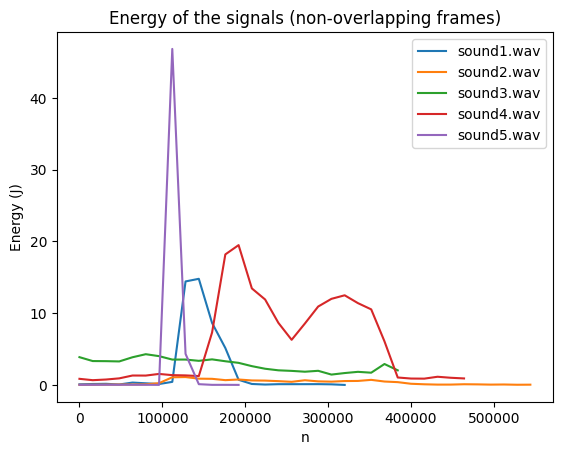

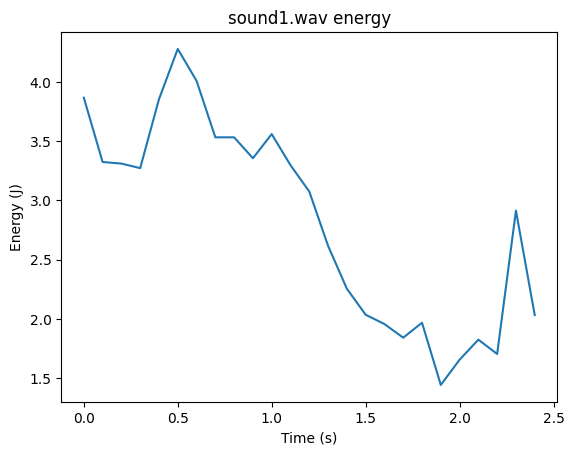

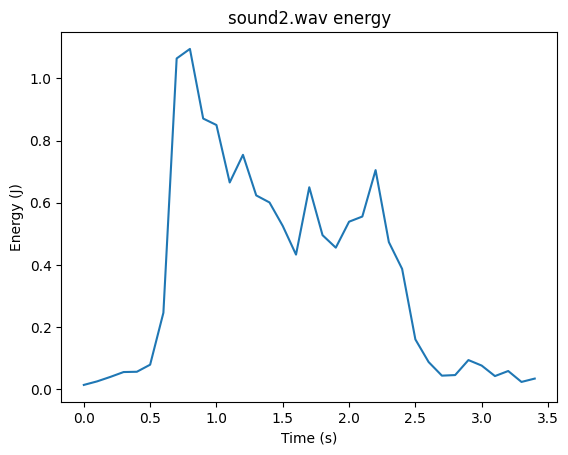

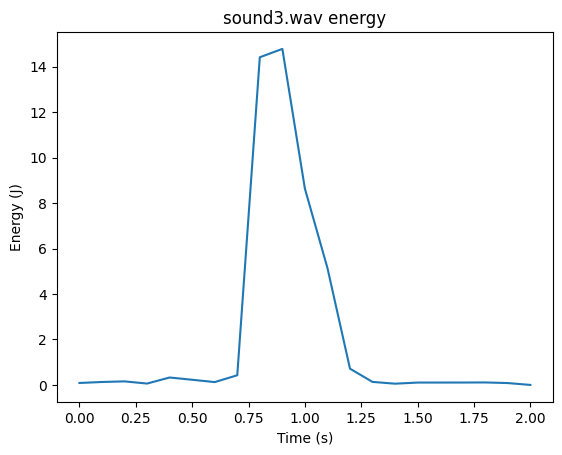

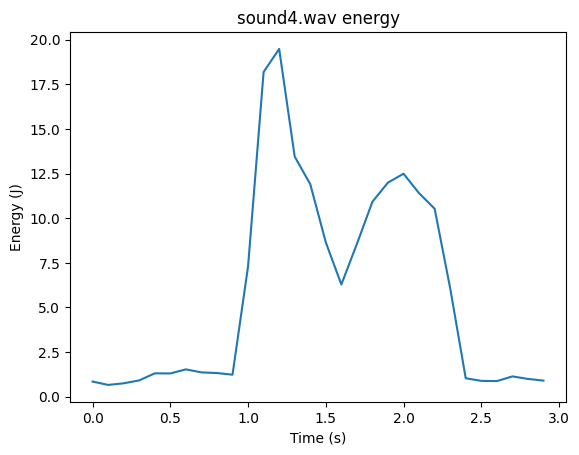

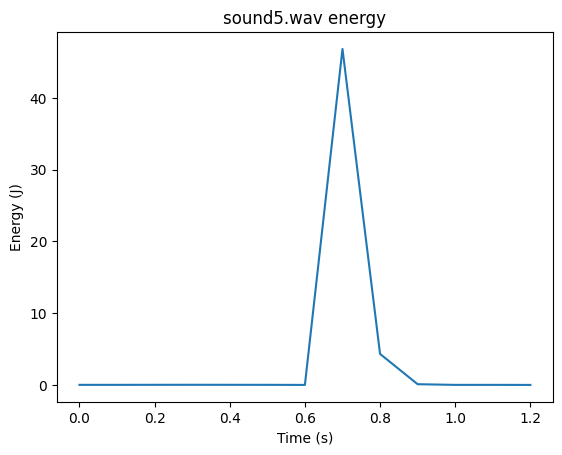

In [24]:
# plot the energy of the signals in discrete time
t1 = np.arange(len(E1_frames)) * fs1
t2 = np.arange(len(E2_frames)) * fs2
t3 = np.arange(len(E3_frames)) * fs3
t4 = np.arange(len(E4_frames)) * fs4
t5 = np.arange(len(E5_frames)) * fs5

plt.plot(t1, E1_frames, label='sound1.wav')
plt.plot(t2, E2_frames, label='sound2.wav')
plt.plot(t3, E3_frames, label='sound3.wav')
plt.plot(t4, E4_frames, label='sound4.wav')
plt.plot(t5, E5_frames, label='sound5.wav')
plt.xlabel('n')
plt.ylabel('Energy (J)')
plt.title('Energy of the signals (non-overlapping frames)')
plt.legend()
plt.show()

# plot the energy of the signals in continuous time
# the sampling frequency is 10Hz because the frames are 100ms long
plot_continuous(E3_frames, 10, 'sound1.wav energy', 'Energy (J)')
plot_continuous(E2_frames, 10, 'sound2.wav energy', ylabel='Energy (J)')
plot_continuous(E1_frames, 10, 'sound3.wav energy', ylabel='Energy (J)')
plot_continuous(E4_frames, 10, 'sound4.wav energy', ylabel='Energy (J)')
plot_continuous(E5_frames, 10, 'sound5.wav energy', ylabel='Energy (J)')

In [25]:
# get the energy of the signals in overlapping frames of 100ms with 50% overlap
E1_frames = (overlapping_frames(y1, fs1, 0.02, 0.5) ** 2).sum(axis=0)
E2_frames = (overlapping_frames(y2, fs2, 0.02, 0.5) ** 2).sum(axis=0)
E3_frames = (overlapping_frames(y3, fs3, 0.02, 0.5) ** 2).sum(axis=0)
E4_frames = (overlapping_frames(y4, fs4, 0.02, 0.5) ** 2).sum(axis=0)
E5_frames = (overlapping_frames(y5, fs5, 0.02, 0.5) ** 2).sum(axis=0)

print(f'Energy of sound1.wav (overlapping frames 50%): {E1_frames} J')
print(f'Energy of sound2.wav (overlapping frames 50%): {E2_frames} J')
print(f'Energy of sound3.wav (overlapping frames 50%): {E3_frames} J')
print(f'Energy of sound4.wav (overlapping frames 50%): {E4_frames} J')
print(f'Energy of sound5.wav (overlapping frames 50%): {E5_frames} J')

Energy of sound1.wav (overlapping frames 50%):
 [7.99742993e-03 2.72037834e-03 7.48574734e-04 5.08213975e-03
 1.86440544e-02 3.44176376e-02 4.04170249e-02 3.32879219e-02
 1.77868539e-02 8.62064213e-03 6.38594478e-03 1.02555808e-02
 1.29512222e-02 8.37779045e-03 8.90159700e-03 2.20271591e-02
 3.91845684e-02 4.91195573e-02 6.21121395e-02 6.33310834e-02
 4.47514243e-02 1.97784109e-02 6.67232648e-03 1.84362903e-02
 3.73801524e-02 4.54787090e-02 5.11387801e-02 4.17680955e-02
 1.58950742e-02 4.92286310e-03 9.20366868e-03 1.45235034e-02
 1.45042678e-02 1.09506026e-02 4.77655232e-03 3.42750177e-03
 1.10869706e-02 1.90122621e-02 2.07588663e-02 2.11181035e-02
 1.75188929e-02 9.99182556e-03 2.45580832e-02 7.05421390e-02
 1.11389747e-01 1.24256015e-01 1.13243598e-01 8.38515293e-02
 5.98890847e-02 7.03425789e-02 9.88535332e-02 1.08563916e-01
 8.68112119e-02 5.19829635e-02 2.58229580e-02 9.06430464e-03
 2.71520764e-03 5.26730996e-03 1.28649315e-02 1.48928324e-02
 7.56013114e-03 5.19244280e-03 1.3461

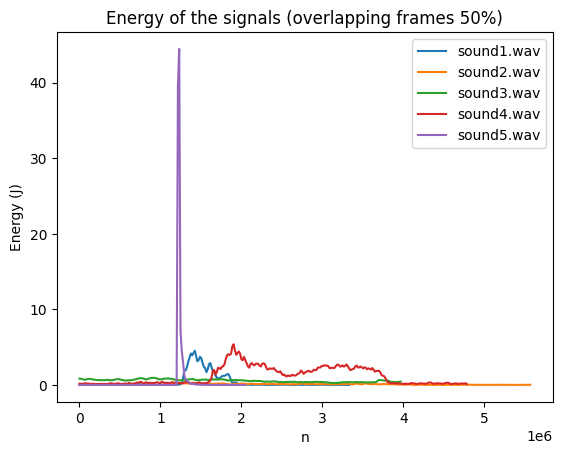

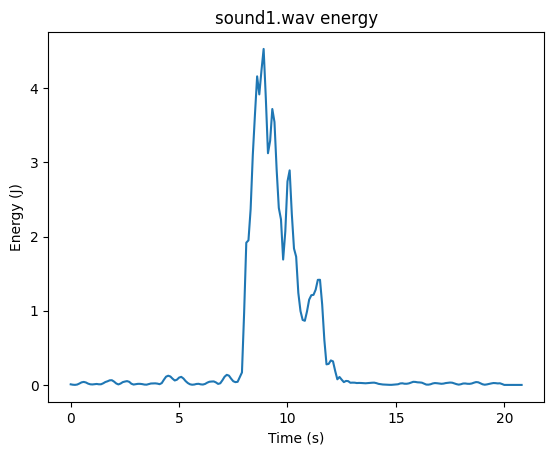

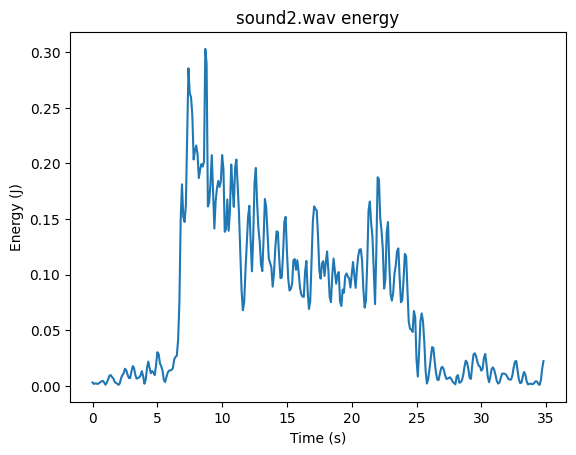

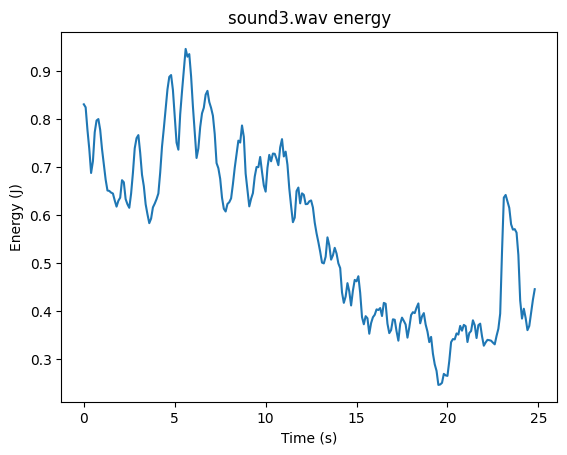

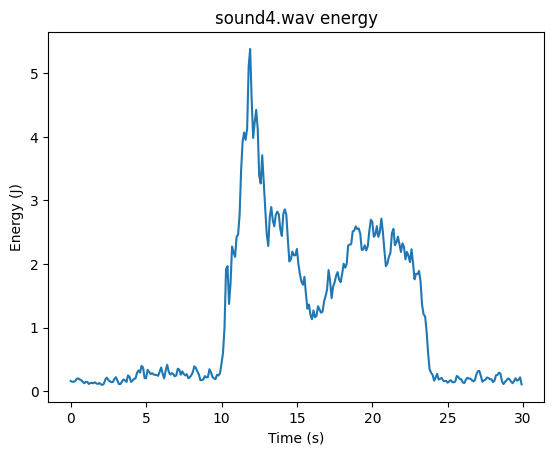

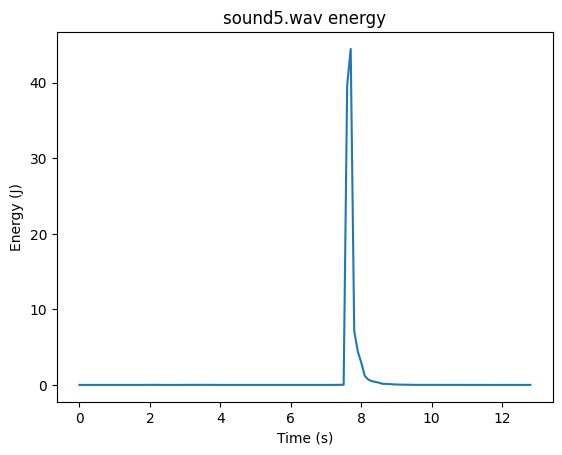

In [26]:
# plot the energy of the signals in discrete time
t1 = np.arange(len(E1_frames)) * fs1
t2 = np.arange(len(E2_frames)) * fs2
t3 = np.arange(len(E3_frames)) * fs3
t4 = np.arange(len(E4_frames)) * fs4
t5 = np.arange(len(E5_frames)) * fs5

plt.plot(t1, E1_frames, label='sound1.wav')
plt.plot(t2, E2_frames, label='sound2.wav')
plt.plot(t3, E3_frames, label='sound3.wav')
plt.plot(t4, E4_frames, label='sound4.wav')
plt.plot(t5, E5_frames, label='sound5.wav')
plt.xlabel('n')
plt.ylabel('Energy (J)')
plt.title('Energy of the signals (overlapping frames 50%)')
plt.legend()
plt.show()

# plot the energy of the signals in continuous time
# the sampling frequency is 10Hz because the frames are 100ms long
plot_continuous(E1_frames, 10, 'sound1.wav energy', ylabel='Energy (J)')
plot_continuous(E2_frames, 10, 'sound2.wav energy', ylabel='Energy (J)')
plot_continuous(E3_frames, 10, 'sound3.wav energy', ylabel='Energy (J)')
plot_continuous(E4_frames, 10, 'sound4.wav energy', ylabel='Energy (J)')
plot_continuous(E5_frames, 10, 'sound5.wav energy', ylabel='Energy (J)')